In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('live_data.csv', low_memory = False)
df

,Unnamed: 0,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,...,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,0,1.557362e+09,41611464.0,2019-05-09 00:39:07,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1,1.557362e+09,41611496.0,2019-05-09 00:39:41,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,2,1.557362e+09,41611523.0,2019-05-09 00:40:17,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,3,1.557362e+09,41611552.0,2019-05-09 00:40:52,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,4,1.557362e+09,41611581.0,2019-05-09 00:41:26,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,...,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,5,1.557363e+09,41611613.0,2019-05-09 00:42:01,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,...,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,6,1.557363e+09,41611641.0,2019-05-09 00:42:36,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,...,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,7,1.557363e+09,41611672.0,2019-05-09 00:43:11,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,...,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,8,1.557363e+09,41611702.0,2019-05-09 00:43:46,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,...,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,9,1.557363e+09,41611731.0,2019-05-09 00:44:21,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,...,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER


In [4]:
df1 = df.drop(['Unnamed: 0'], axis=1)
df1.head()

,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,1.557362e+09,41611464.0,2019-05-09 00:39:07,103.0,kripya.d180121,2.0,35.693696,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1.557362e+09,41611496.0,2019-05-09 00:39:41,103.0,kripya.d180121,2.0,35.886784,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,1.557362e+09,41611523.0,2019-05-09 00:40:17,103.0,kripya.d180121,2.0,35.886784,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,1.557362e+09,41611552.0,2019-05-09 00:40:52,103.0,kripya.d180121,2.0,36.300544,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,1.557362e+09,41611581.0,2019-05-09 00:41:26,103.0,kripya.d180121,2.0,36.493632,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER


In [5]:
df1['updatedDT'] = pd.to_datetime(df1['updatedDT'])

In [6]:
df1['updatedDT'] = df1['updatedDT'].dt.tz_localize("GMT").dt.tz_convert('Asia/Calcutta')
df1.head()

,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,1.557362e+09,41611464.0,2019-05-09 06:09:07+05:30,103.0,kripya.d180121,2.0,35.693696,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1.557362e+09,41611496.0,2019-05-09 06:09:41+05:30,103.0,kripya.d180121,2.0,35.886784,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,1.557362e+09,41611523.0,2019-05-09 06:10:17+05:30,103.0,kripya.d180121,2.0,35.886784,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,1.557362e+09,41611552.0,2019-05-09 06:10:52+05:30,103.0,kripya.d180121,2.0,36.300544,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,1.557362e+09,41611581.0,2019-05-09 06:11:26+05:30,103.0,kripya.d180121,2.0,36.493632,NaN,0.0,93.362885,3.7869,NaN,0.0,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER


In [7]:
df1['updatedDT'] = df1['updatedDT'].dt.tz_localize(None)

In [8]:
df1['UID'].value_counts()

kripya.d180103    63928
kripya.d180101    63928
kripya.d180105    63925
kripya.d180104    62892
kripya.d180121    54080
180123            48342
180121            47202
kripya.d180123    45939
kripya.d180142    24964
kripya.d180141    19480
kripya.d180143    19456
Name: UID, dtype: int64

In [9]:
ts = df1[(df1.UID == 'kripya.d180121')]
ts

,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
0,1.557362e+09,41611464.0,2019-05-09 06:09:07,103.0,kripya.d180121,2.0,35.693696,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.760,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
1,1.557362e+09,41611496.0,2019-05-09 06:09:41,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
2,1.557362e+09,41611523.0,2019-05-09 06:10:17,103.0,kripya.d180121,2.0,35.886784,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.808,SYSTEM_STARTUP,FLYBACK_OUTPUT_VOLTAGE,MASTER
3,1.557362e+09,41611552.0,2019-05-09 06:10:52,103.0,kripya.d180121,2.0,36.300544,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
4,1.557362e+09,41611581.0,2019-05-09 06:11:26,103.0,kripya.d180121,2.0,36.493632,NaN,0.000000,93.362885,3.7869,NaN,0.000000,124.061427,123.809949,0.251477,47.952,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
5,1.557363e+09,41611613.0,2019-05-09 06:12:01,103.0,kripya.d180121,2.0,34.052448,0.000000,0.000000,93.362885,238.2189,0.0869,20.701222,124.061628,123.810151,0.251477,46.800,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
6,1.557363e+09,41611641.0,2019-05-09 06:12:36,103.0,kripya.d180121,2.0,35.610944,0.000000,0.000000,93.362885,238.0269,0.0281,6.688556,124.061693,123.810216,0.251477,46.944,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
7,1.557363e+09,41611672.0,2019-05-09 06:13:11,103.0,kripya.d180121,2.0,35.831616,0.000000,0.000000,93.362885,236.9229,0.0501,11.869837,124.061808,123.810331,0.251477,48.192,GRID_MODE,NO_FAULT,MASTER
8,1.557363e+09,41611702.0,2019-05-09 06:13:46,103.0,kripya.d180121,2.0,35.114432,0.000000,0.000000,93.362885,235.1469,0.0697,16.389739,124.061968,123.810490,0.251477,47.712,GRID_MODE,NO_FAULT,MASTER
9,1.557363e+09,41611731.0,2019-05-09 06:14:21,103.0,kripya.d180121,2.0,36.121248,0.000000,0.000000,93.362885,235.7709,0.0065,1.532511,124.061983,123.810505,0.251477,48.384,GRID_MODE,NO_FAULT,MASTER


In [10]:
tss = df1[(df1.UID == '180121')]
tss

,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
63484,1.548984e+09,37939900.0,2019-02-01 06:51:50,103.0,180121,3.0,37.734912,NaN,0.000000,7.973299,3.7869,NaN,0.000000,11.236247,2.778686,8.457561,43.152,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
63485,1.548984e+09,37939906.0,2019-02-01 06:52:27,103.0,180121,3.0,36.728096,0.000000,0.000000,7.973299,240.8589,0.0553,13.319497,11.236384,2.778823,8.457561,43.152,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
63486,1.548984e+09,37939912.0,2019-02-01 06:53:02,103.0,180121,3.0,36.562592,0.000000,0.000000,7.973299,242.2989,0.0081,1.962621,11.236403,2.778842,8.457561,43.824,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
63487,1.548984e+09,37939919.0,2019-02-01 06:53:42,103.0,180121,3.0,36.686720,0.000000,0.000000,7.973299,241.0509,0.0057,1.373990,11.236418,2.778857,8.457561,43.392,GRID_MODE,NO_FAULT,MASTER
63488,1.548984e+09,37939927.0,2019-02-01 06:54:17,103.0,180121,3.0,37.031520,0.000000,0.000000,7.973299,241.7709,0.0045,1.087969,11.236429,2.778868,8.457561,44.592,GRID_MODE,NO_FAULT,MASTER
63489,1.548984e+09,37939934.0,2019-02-01 06:54:52,103.0,180121,3.0,37.086688,0.000000,0.000000,7.973299,241.5309,0.0113,2.729299,11.236455,2.778894,8.457561,44.688,GRID_MODE,NO_FAULT,MASTER
63490,1.548984e+09,37939940.0,2019-02-01 06:55:30,103.0,180121,3.0,37.472864,0.000000,0.000000,7.973299,241.4349,0.0113,2.728214,11.236484,2.778923,8.457561,44.064,GRID_MODE,DRIVE_SUPPLY,MASTER
63491,1.548984e+09,37939947.0,2019-02-01 06:56:04,103.0,180121,3.0,37.472864,0.000000,0.000000,7.973299,241.4349,0.0113,2.728214,11.236510,2.778949,8.457561,44.064,GRID_MODE,DRIVE_SUPPLY,MASTER
63492,1.548984e+09,37939953.0,2019-02-01 06:56:40,103.0,180121,3.0,37.472864,0.000000,0.000000,7.973299,241.4349,0.0113,2.728214,11.236537,2.778976,8.457561,44.064,GRID_MODE,DRIVE_SUPPLY,MASTER
63493,1.548984e+09,37939959.0,2019-02-01 06:57:19,103.0,180121,3.0,35.721280,0.314488,11.233907,7.973421,240.8589,0.0253,6.093730,11.236603,2.779042,8.457561,44.880,GRID_MODE,NO_FAULT,MASTER


In [11]:
frame = [ts,tss]

In [12]:
result = pd.concat(frame)

In [13]:
result.shape

(101282, 20)

In [14]:
dff = result.sort_values(by='updatedDT')
dff

,timestamp,dataId,updatedDT,SystemID,UID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature,SystemStatus,TripError,MasterSlave
63484,1.548984e+09,37939900.0,2019-02-01 06:51:50,103.0,180121,3.0,37.734912,NaN,0.000000,7.973299,3.7869,NaN,0.000000,11.236247,2.778686,8.457561,43.152,SYSTEM_ERROR,FLYBACK_OUTPUT_VOLTAGE,MASTER
63485,1.548984e+09,37939906.0,2019-02-01 06:52:27,103.0,180121,3.0,36.728096,0.000000,0.000000,7.973299,240.8589,0.0553,13.319497,11.236384,2.778823,8.457561,43.152,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
63486,1.548984e+09,37939912.0,2019-02-01 06:53:02,103.0,180121,3.0,36.562592,0.000000,0.000000,7.973299,242.2989,0.0081,1.962621,11.236403,2.778842,8.457561,43.824,GRID_MODE,FLYBACK_OUTPUT_VOLTAGE,MASTER
63487,1.548984e+09,37939919.0,2019-02-01 06:53:42,103.0,180121,3.0,36.686720,0.000000,0.000000,7.973299,241.0509,0.0057,1.373990,11.236418,2.778857,8.457561,43.392,GRID_MODE,NO_FAULT,MASTER
63488,1.548984e+09,37939927.0,2019-02-01 06:54:17,103.0,180121,3.0,37.031520,0.000000,0.000000,7.973299,241.7709,0.0045,1.087969,11.236429,2.778868,8.457561,44.592,GRID_MODE,NO_FAULT,MASTER
63489,1.548984e+09,37939934.0,2019-02-01 06:54:52,103.0,180121,3.0,37.086688,0.000000,0.000000,7.973299,241.5309,0.0113,2.729299,11.236455,2.778894,8.457561,44.688,GRID_MODE,NO_FAULT,MASTER
63490,1.548984e+09,37939940.0,2019-02-01 06:55:30,103.0,180121,3.0,37.472864,0.000000,0.000000,7.973299,241.4349,0.0113,2.728214,11.236484,2.778923,8.457561,44.064,GRID_MODE,DRIVE_SUPPLY,MASTER
63491,1.548984e+09,37939947.0,2019-02-01 06:56:04,103.0,180121,3.0,37.472864,0.000000,0.000000,7.973299,241.4349,0.0113,2.728214,11.236510,2.778949,8.457561,44.064,GRID_MODE,DRIVE_SUPPLY,MASTER
63492,1.548984e+09,37939953.0,2019-02-01 06:56:40,103.0,180121,3.0,37.472864,0.000000,0.000000,7.973299,241.4349,0.0113,2.728214,11.236537,2.778976,8.457561,44.064,GRID_MODE,DRIVE_SUPPLY,MASTER
63493,1.548984e+09,37939959.0,2019-02-01 06:57:19,103.0,180121,3.0,35.721280,0.314488,11.233907,7.973421,240.8589,0.0253,6.093730,11.236603,2.779042,8.457561,44.880,GRID_MODE,NO_FAULT,MASTER


In [15]:
df3 = dff.set_index('updatedDT')
df3.index

DatetimeIndex(['2019-02-01 06:51:50', '2019-02-01 06:52:27',
               '2019-02-01 06:53:02', '2019-02-01 06:53:42',
               '2019-02-01 06:54:17', '2019-02-01 06:54:52',
               '2019-02-01 06:55:30', '2019-02-01 06:56:04',
               '2019-02-01 06:56:40', '2019-02-01 06:57:19',
               ...
               '2019-06-16 18:19:41', '2019-06-16 18:20:17',
               '2019-06-16 18:20:53', '2019-06-16 18:21:30',
               '2019-06-16 18:22:06', '2019-06-16 18:22:42',
               '2019-06-16 18:23:18', '2019-06-16 18:23:55',
               '2019-06-16 18:24:31', '2019-06-16 18:25:07'],
              dtype='datetime64[ns]', name=u'updatedDT', length=101282, freq=None)

In [16]:
hourly = df3.resample('H').sum()
hourly

,timestamp,dataId,SystemID,DeviceCount,InputPVVoltage,InputPVCurrent,InputPVPower,InputPVEnergyTotal,OutputACVoltage,OutputACCurrent,OutputACPower,OutputACEnergyTotal,OutputACEnergyOnGrid,OutputACEnergyOffGrid,Temperature
updatedDT,,,,,,,,,,,,,,,
2019-02-01 06:00:00,2.168578e+10,5.311592e+08,1442.0,42.0,522.620256,0.314488,11.233907,111.626801,3137.4486,0.1531,36.911142,157.310933,38.905085,118.405848,618.288
2019-02-01 07:00:00,1.440557e+11,3.528475e+09,9579.0,279.0,3461.460992,65.683605,2477.989894,742.338670,21539.6697,8.6620,2051.095246,1045.617383,259.064248,786.553135,4314.240
2019-02-01 08:00:00,1.301152e+11,3.187103e+09,8652.0,252.0,3148.823936,193.446972,7242.805724,675.435769,20155.8276,32.6396,7830.561708,949.395170,238.960080,710.435089,4327.776
2019-02-01 09:00:00,1.084296e+11,2.655985e+09,7210.0,210.0,2606.274240,216.125300,7989.920536,569.767579,15812.2830,41.9172,8572.215662,798.652720,206.617983,592.034737,3679.344
2019-02-01 10:00:00,4.646991e+10,1.138300e+09,3090.0,90.0,1048.688512,120.907400,4346.737804,248.301387,6977.0790,19.0829,4590.090722,346.642632,92.908944,253.733688,1642.416
2019-02-01 11:00:00,4.801902e+10,1.176262e+09,3193.0,93.0,1118.669120,123.115700,4451.581703,261.556805,7347.0099,19.8247,4699.522187,363.429423,101.237945,262.191478,1782.240
2019-02-01 12:00:00,4.337212e+10,1.062445e+09,2884.0,84.0,1008.815840,111.543800,4002.265971,240.360001,6702.7212,17.5520,4206.362314,332.587155,95.769046,236.818109,1626.192
2019-02-01 13:00:00,4.801924e+10,1.176293e+09,3193.0,93.0,1107.580352,106.060211,3759.067421,269.390979,7440.7059,15.9963,3846.511689,371.603732,109.412255,262.191478,1755.504
2019-02-01 14:00:00,5.266640e+10,1.290145e+09,3502.0,102.0,1240.769696,29.539275,1077.471688,298.692726,8107.2186,3.4813,829.574127,410.741558,123.176711,287.564847,1835.904


In [17]:
import datetime
dfff = hourly.ix[hourly.index.indexer_between_time(datetime.time(6), datetime.time(18))]

C:\Users\Sudharsan\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [18]:
dfff.isnull().sum()

timestamp                0
dataId                   0
SystemID                 0
DeviceCount              0
InputPVVoltage           0
InputPVCurrent           0
InputPVPower             0
InputPVEnergyTotal       0
OutputACVoltage          0
OutputACCurrent          0
OutputACPower            0
OutputACEnergyTotal      0
OutputACEnergyOnGrid     0
OutputACEnergyOffGrid    0
Temperature              0
dtype: int64

In [19]:
x = dfff[['OutputACPower']]
x

,OutputACPower
updatedDT,
2019-02-01 06:00:00,36.911142
2019-02-01 07:00:00,2051.095246
2019-02-01 08:00:00,7830.561708
2019-02-01 09:00:00,8572.215662
2019-02-01 10:00:00,4590.090722
2019-02-01 11:00:00,4699.522187
2019-02-01 12:00:00,4206.362314
2019-02-01 13:00:00,3846.511689
2019-02-01 14:00:00,829.574127


In [20]:
x1 = x.loc[x.OutputACPower != 0]

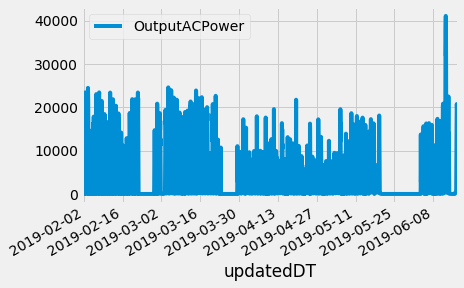

In [21]:
x.plot()

In [22]:
split_date = '31-05-2019'

In [24]:
train = x.loc[x.index <= split_date].copy()
test = x.loc[x.index > split_date].copy()

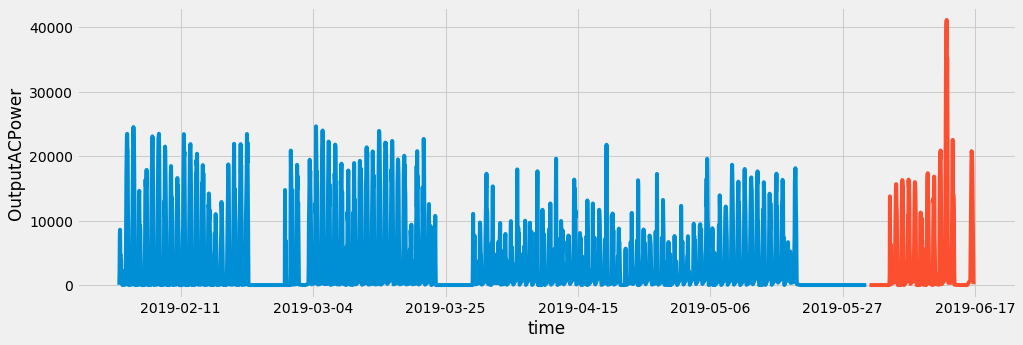

In [25]:
plt.figure(figsize=(15,5))
plt.xlabel('time')
plt.ylabel('OutputACPower')
plt.plot(train.index,train)
plt.plot(test.index,test)
plt.show()

In [26]:
def create_features(df):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    return X

In [27]:
X_train, y_train = create_features(train), train['OutputACPower']
X_test, y_test   = create_features(test), test['OutputACPower']

X_train.shape, y_train.shape

((1547, 8), (1547L,))

In [28]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50, #stop if 50 consequent rounds without decrease of error
        verbose=False) # Change verbose to True if you want to see it train

C:\Users\Sudharsan\Anaconda2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sudharsan\Anaconda2\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

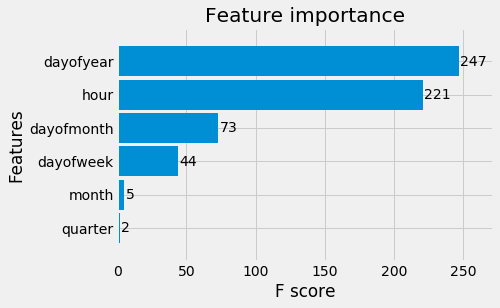

In [29]:
xgb.plot_importance(reg, height=0.9)

In [34]:
def plot_performance(base_data, date_from, date_to, title=None):
    plt.figure(figsize=(15,3))
    if title == None:
        plt.title('From {0} To {1}'.format(date_from, date_to))
    else:
        plt.title(title)
    plt.xlabel('time')
    plt.ylabel('OutputACPower')
    plt.plot(x.index,x, label='data')
    plt.plot(X_test.index,X_test_pred, label='prediction')
    plt.legend()
    plt.xlim(left=date_from, right=date_to)


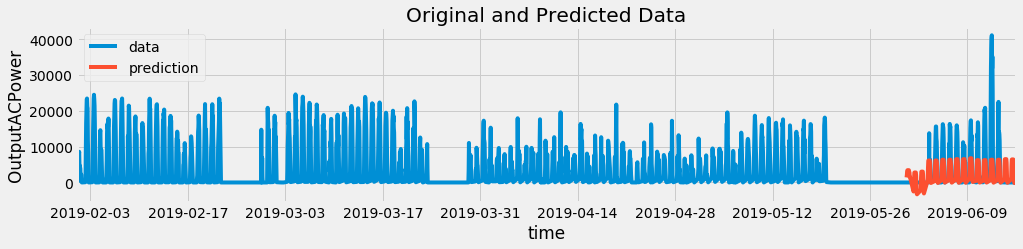

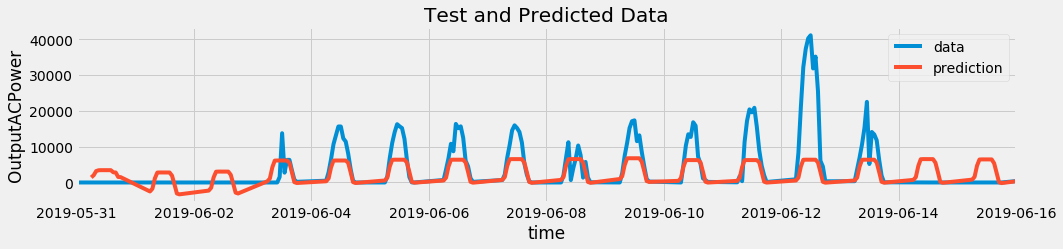

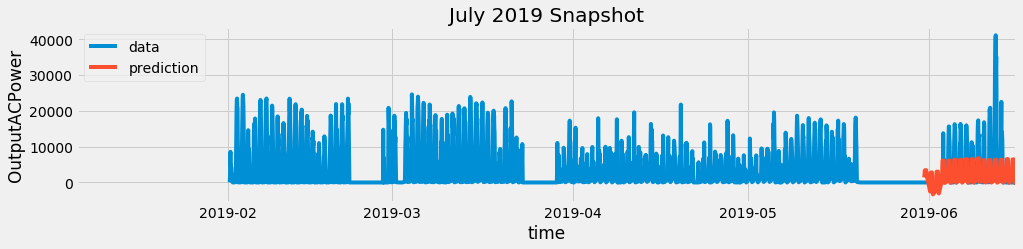

In [35]:
X_test_pred = reg.predict(X_test)
    
plot_performance(x, x.index[0].date(), x.index[-1].date(),
                 'Original and Predicted Data')

plot_performance(y_test, y_test.index[0].date(), y_test.index[-1].date(),
                 'Test and Predicted Data')

plot_performance(y_test, '01-06-2019', '16-06-2019', 'July 2019 Snapshot')

plt.legend()

plt.show()

In [36]:
mean_squared_error(y_true=y_test,
                   y_pred=X_test_pred)

53903147.14328317

In [37]:
mean_absolute_error(y_true=y_test,
                   y_pred=X_test_pred)

4678.633801334368